In [49]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

In [236]:
%load_ext autoreload
%autoreload 2

In [52]:
series = read_csv('temperature - temperature.csv', header=0, index_col=0)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [53]:
import matplotlib.pyplot as plt

In [54]:
from statsmodels.tsa.ar_model import AutoReg as AR
from sklearn.metrics import mean_squared_error

Lag: <statsmodels.tsa.ar_model.AutoRegResultsWrapper object at 0x7f2bb5dbe860>
Coefficients: [2.05155974e+01 3.16997098e-01 4.97988658e-02 ... 4.91296199e-03
 1.09503421e-02 5.30677068e-03]
Test Error: 3.793


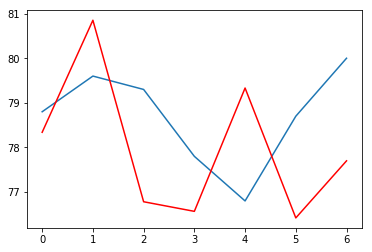

In [55]:
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
model = AR(train, lags=365*3)

model_fit = model.fit()

predictions = model_fit.predict(test)

error = mean_squared_error(test, predictions)
print(error)

pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Test Error: 1.499


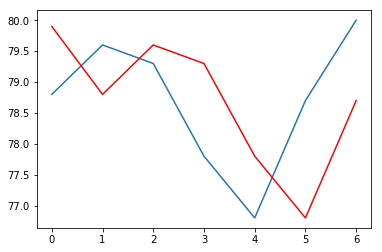

In [56]:
# Keep previous values
predictions = list()
for x in test_X:
    yhat = x
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print(test_score)
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

In [57]:
import keras

In [58]:
from keras import layers

In [59]:
from keras import Sequential

In [60]:
from keras import backend as K
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

In [61]:
model = Sequential()

model.add(layers.Embedding(input_dim=1000, output_dim=64))

model.add(layers.SimpleRNN(64))

model.add(layers.Dense(1))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 72,321
Trainable params: 72,321
Non-trainable params: 0
_________________________________________________________________


In [62]:
#series.shape

In [45]:
x = series['temperature'][:-100]

In [46]:
y = series['temperature'][1:-99]

In [47]:
model.compile(loss='mae', optimizer='adam')

In [63]:
# model.fit(x, y, epochs=40, batch_size=64)

In [20]:
# from keras import backend as K
# K.tensorflow_backend._get_available_gpus()

In [64]:
# model.predict(series['temperature'][-6:-2])

In [59]:
series['temperature'][-5:-1]

Date
01-23-2020    79.3
01-24-2020    77.8
01-25-2020    76.8
01-26-2020    78.7
Name: temperature, dtype: float64

In [60]:
test_Res = model.predict(test)

In [30]:
test

array([[78.8],
       [79.6],
       [79.3],
       [77.8],
       [76.8],
       [78.7],
       [80. ]])

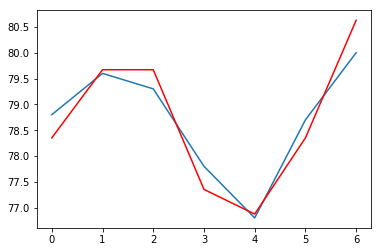

In [61]:
pyplot.plot(test)
pyplot.plot(test_Res, color='red')
pyplot.show()

In [20]:
ls

'0th review.pptx'*                 INCHENAI.txt*
 chennai_reservoir_levels.csv*     temperature.csv*
 chennai_reservoir_rainfall.csv*  'temperature - temperature.csv'*
 EDA.ipynb*                        temp.ipynb*


In [21]:
rain = read_csv('chennai_reservoir_rainfall.csv')

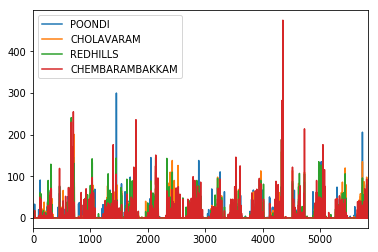

In [22]:
rain.plot()

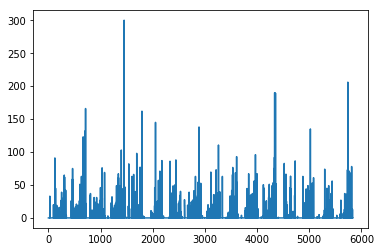

In [23]:
plt.plot(rain['POONDI'])

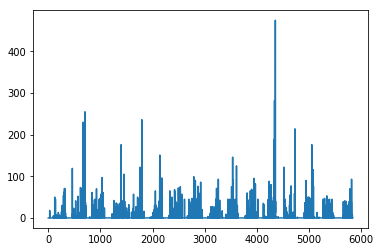

In [24]:
plt.plot(rain['CHEMBARAMBAKKAM'])

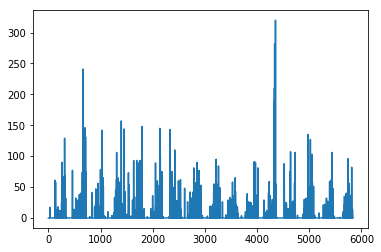

In [25]:
plt.plot(rain['REDHILLS'])

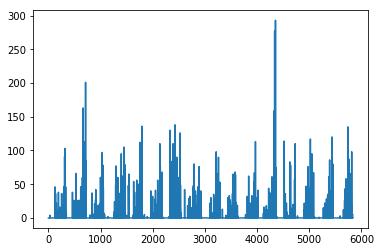

In [26]:
plt.plot(rain['CHOLAVARAM'])

In [27]:
model = Sequential()

model.add(layers.Embedding(input_dim=1000, output_dim=64))

model.add(layers.LSTM(64))

model.add(layers.Dense(1))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 97,089
Trainable params: 97,089
Non-trainable params: 0
_________________________________________________________________


In [35]:
def Model():
    model = Sequential([layers.Embedding(input_dim=1000, output_dim=64),
                       layers.LSTM(64),
                       layers.Dense(1)])
    model.compile(loss='mae', optimizer='adam')
    return model

In [36]:
md = Model()

In [65]:
# md.fit(x, y, epochs=20, batch_size=64)

In [54]:
x[0:5]

Date
01-01-1995    72.4
01-02-1995    73.5
01-03-1995    72.6
01-04-1995    75.2
01-05-1995    74.8
Name: temperature, dtype: float64

In [55]:
md.predict(x[0:5])

array([[74.1002  ],
       [75.920105],
       [74.1002  ],
       [76.24014 ],
       [75.72263 ]], dtype=float32)

In [84]:
dp10 = model.predict(dt)

In [86]:
dt = x[0:1]

In [85]:
dt

array([[76.87471 ],
       [76.87471 ],
       [76.87471 ],
       [76.87471 ],
       [76.87471 ],
       [76.87471 ],
       [78.35028 ],
       [78.35028 ],
       [78.35028 ],
       [79.6707  ],
       [77.352325]], dtype=float32)

In [87]:
dt

Date
01-01-1995    72.4
Name: temperature, dtype: float64

In [88]:
dp1 = []

In [89]:
for i in range(6):
    dt = model.predict(dt)
    dp1.append(dt)

In [90]:
dp1

[array([[73.81857]], dtype=float32),
 array([[74.47859]], dtype=float32),
 array([[76.134125]], dtype=float32),
 array([[76.87471]], dtype=float32),
 array([[76.87471]], dtype=float32),
 array([[76.87471]], dtype=float32)]

In [78]:
dp10

array([[86.18312 ],
       [86.18312 ],
       [88.2327  ],
       [87.686356],
       [88.2327  ]], dtype=float32)

In [14]:
n_steps = 3

In [16]:
def split_sequences(sequences, n_steps):
    X, y = [], []
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, : -1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
        

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
temp = pd.read_csv('processed-temperature.csv')

In [27]:
temp = temp.drop(columns='Unnamed: 0')

In [29]:
ls

'0th review.pptx'*                 processed-temperature.csv*
 chennai_reservoir_levels.csv*     temperature.csv*
 chennai_reservoir_rainfall.csv*  'temperature - temperature.csv'*
 EDA.ipynb*                        temp.ipynb*
 INCHENAI.txt*                     text_generation.ipynb*


In [30]:
rain = pd.read_csv('chennai_reservoir_rainfall.csv')

In [32]:
rain.describe()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
count,5836.000000,5836.000000,5836.000000,5836.000000
mean,3.464402,3.758773,3.828992,4.012688
std,13.065897,14.267783,15.011809,16.251079
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,300.000000,293.000000,320.000000,475.000000


In [34]:
temp.head()

,Date,temperature
0,1995-01-01,72.4
1,1995-01-02,73.5
2,1995-01-03,72.6
3,1995-01-04,75.2
4,1995-01-05,74.8


In [35]:
rain.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,0.0,0.0,0.0,0.0
1,02-01-2004,0.0,0.0,0.0,0.0
2,03-01-2004,0.0,0.0,0.0,0.0
3,04-01-2004,0.0,0.0,0.0,0.0
4,05-01-2004,0.0,0.0,0.0,0.0


In [37]:
temp[temp['Date'] == '2004-01-01']

,Date,temperature
3287,2004-01-01,76.9


In [38]:
idx = 3287

In [42]:
temp.shape

(9158, 2)

In [57]:
tmp = temp[3287:]

In [59]:
tmp.iloc[0]

Date           2004-01-01
temperature          76.9
Name: 3287, dtype: object

In [72]:
tmp.iloc[-1]

Date           2020-01-27
temperature            80
Name: 9157, dtype: object

In [68]:
rain.iloc[-1]

Date               23-12-2019
POONDI                      0
CHOLAVARAM                  0
REDHILLS                    0
CHEMBARAMBAKKAM             0
Name: 5835, dtype: object

In [82]:
tmp[tmp['Date'] == '2019-12-24']

,Date,temperature
9123,2019-12-24,77.5


In [85]:
tmp = tmp.loc[:9123]

In [97]:
tmp.shape

(5836, 2)

In [96]:
tmp = tmp.drop(tmp.index[-1])

In [216]:
# rain.head()

In [98]:
rain["Date"] = pd.to_datetime(rain["Date"], format='%d-%m-%Y')

In [217]:
rain.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,0.0,0.0,0.0,0.0
1,2004-01-02,0.0,0.0,0.0,0.0
2,2004-01-03,0.0,0.0,0.0,0.0
3,2004-01-04,0.0,0.0,0.0,0.0
4,2004-01-05,0.0,0.0,0.0,0.0


In [100]:
water_level = pd.read_csv('chennai_reservoir_levels.csv')

In [218]:
water_level.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,3.9,0.0,268.0,0.0
1,02-01-2004,3.9,0.0,268.0,0.0
2,03-01-2004,3.9,0.0,267.0,0.0
3,04-01-2004,3.9,0.0,267.0,0.0
4,05-01-2004,3.8,0.0,267.0,0.0


In [124]:
# input_seq = temp['temperature'][1:] + rain['POONDI'][1:] + water_level['POONDI'][:-1]

In [163]:
input_seq = pd.DataFrame()

In [164]:
input_seq['temperature'] = tmp['temperature'][1:].values
input_seq['rain'] = rain['POONDI'][1:].values
input_seq['water_level'] = water_level['POONDI'][:-1].values

In [165]:
tmp['temperature'][1:].values.shape

(5835,)

In [166]:
rain['POONDI'][1:]

1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
       ... 
5831    0.0
5832    0.0
5833    0.0
5834    0.0
5835    0.0
Name: POONDI, Length: 5835, dtype: float64

In [167]:
input_seq['rain']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5830    0.0
5831    0.0
5832    0.0
5833    0.0
5834    0.0
Name: rain, Length: 5835, dtype: float64

In [168]:
tmp.shape

(5836, 2)

In [169]:
tmp.index = range(5836)

In [173]:
output_seq = water_level['POONDI'][1:].values

In [171]:
input_seq.values

array([[  75.1,    0. ,    3.9],
       [  74.3,    0. ,    3.9],
       [  75.6,    0. ,    3.9],
       ...,
       [  79.7,    0. , 1529. ],
       [  78.5,    0. , 1522. ],
       [  79. ,    0. , 1514. ]])

In [219]:
# tmp

In [220]:
input_seq.head()

,temperature,rain,water_level
0,75.1,0.0,3.9
1,74.3,0.0,3.9
2,75.6,0.0,3.9
3,76.3,0.0,3.9
4,76.0,0.0,3.8


In [179]:
output_seq.resize(output_seq.shape[0], 1)

In [180]:
dataset = hstack((input_seq, output_seq))

In [178]:
input_seq.shape

(5835, 3)

In [182]:
X, y = split_sequences(dataset, n_steps)

In [184]:
y.shape

(5833,)

In [186]:
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [221]:
# fit model
model.fit(X[:-50, :, :], y[:-50], epochs=100)

Epoch 1/100
5783/5783 [==============================] - 1s 122us/step - loss: 3545.9042
Epoch 2/100
5783/5783 [==============================] - 1s 120us/step - loss: 3476.8187
Epoch 3/100
5783/5783 [==============================] - 1s 128us/step - loss: 3478.0554
Epoch 4/100
5783/5783 [==============================] - 1s 135us/step - loss: 3502.2877
Epoch 5/100
5783/5783 [==============================] - 1s 124us/step - loss: 3453.2360
Epoch 6/100
5783/5783 [==============================] - 1s 125us/step - loss: 3551.1283
Epoch 7/100
5783/5783 [==============================] - 1s 126us/step - loss: 3498.3779
Epoch 8/100
5783/5783 [==============================] - 1s 125us/step - loss: 3478.6346
Epoch 9/100
5783/5783 [==============================] - 1s 121us/step - loss: 3494.8484
Epoch 10/100
5783/5783 [==============================] - 1s 126us/step - loss: 3529.5244
Epoch 11/100
5783/5783 [==============================] - 1s 125us/step - loss: 3513.8210
Epoch 12/100
5783/5

5783/5783 [==============================] - 1s 125us/step - loss: 3490.6116
Epoch 93/100
5783/5783 [==============================] - 1s 130us/step - loss: 3524.6297
Epoch 94/100
5783/5783 [==============================] - 1s 124us/step - loss: 3522.5599
Epoch 95/100
5783/5783 [==============================] - 1s 128us/step - loss: 3468.0549
Epoch 96/100
5783/5783 [==============================] - 1s 126us/step - loss: 3464.8816
Epoch 97/100
5783/5783 [==============================] - 1s 127us/step - loss: 3477.2957
Epoch 98/100
5783/5783 [==============================] - 1s 125us/step - loss: 3492.1176
Epoch 99/100
5783/5783 [==============================] - 1s 136us/step - loss: 3496.4303
Epoch 100/100
5783/5783 [==============================] - 1s 133us/step - loss: 3493.6423


In [195]:
# input_seq.iloc[-10: -1]

In [202]:
y.shape

(5833,)

In [222]:
inp = X[-300:-1, :, :]

In [223]:
r = model.predict(inp)
res.append(r)

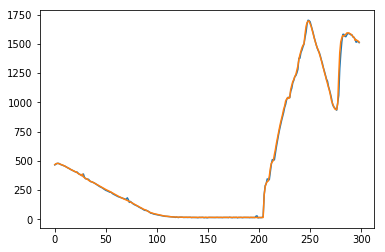

In [224]:
plt.plot(r)
plt.plot(y[-300:-1])

In [244]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
    
model.save_weights("model.h5") 

Saved model to disk


In [227]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 50)                10800     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 10,851
Trainable params: 10,851
Non-trainable params: 0
_________________________________________________________________


In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

Using TensorFlow backend.


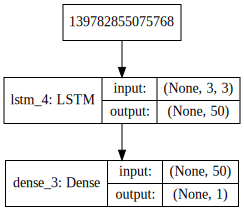

In [7]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [5]:
from keras.models import load_model

In [6]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

model.load_weights("model.h5")


Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# model = load_model("model.h5")

In [1]:
ls

'0th review.pptx'*                 processed-temperature.csv*
 chennai_reservoir_levels.csv*     temperature.csv*
 chennai_reservoir_rainfall.csv*  'temperature - temperature.csv'*
 EDA.ipynb*                        temp.ipynb*
 INCHENAI.txt*                     temp.pdf*
 model.h5*                         text_generation.ipynb*
 model.json*


In [1]:
 import kerastuner

In [2]:
kerastuner.__version__

'1.0.1'

In [3]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [2]:
import torch
from torch import nn
from torch import optim

In [3]:
class lstmRNN(nn.Module): # LSTM
    def __init__(self, input_size, hidden_size, output_size, batch_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.batch_size = batch_size
#         self.ts = ts  # time step
        self.parameters = {'Wf' : torch.randn((hidden_size, input_size + hidden_size)),
                           'Wi' : torch.randn((hidden_size, input_size + hidden_size)),
                           'Wo' : torch.randn((hidden_size, input_size + hidden_size)),
                           'Wc' : torch.randn((hidden_size, input_size + hidden_size)),
                           'Wy' : torch.randn((output_size, hidden_size)),
                           'bf' : torch.randn((hidden_size, 1)),
                           'bi' : torch.randn((hidden_size, 1)),
                           'bo' : torch.randn((hidden_size, 1)),
                           'bc' : torch.randn((hidden_size, 1)),
                           'by' : torch.randn((output_size,1))
                          }
        for i in self.parameters.keys():
            self.parameters[i] = nn.init.xavier_uniform_(self.parameters[i]).to(device)

         
    def forward(self, X):
        self.a = torch.zeros(self.hidden_size, X.shape[1], X.shape[-1]).to(device)
        self.c = torch.zeros(self.hidden_size, X.shape[1], X.shape[-1]).to(device)
        self.y = torch.zeros(self.output_size, X.shape[1], X.shape[-1]).to(device)
        a_prev = torch.randn(self.hidden_size, X.shape[1]).to(device)
        c_prev = torch.zeros(self.hidden_size, X.shape[1]).to(device)
        self.X = X.to(device)
        self.ts = X.shape[-1]
        self.ft = []
        self.it = []
        self.ot = []
        self.cct = []
        for t in range(self.ts):
            xt = X[:, :, t]
            concat = torch.cat((a_prev, xt), dim = 0)
            ft = sigmoid (torch.mm(self.parameters['Wf'], concat) + self.parameters['bf'])
            it = sigmoid (torch.mm(self.parameters['Wi'], concat) + self.parameters['bi'])
            cct = torch.tanh(torch.mm(self.parameters['Wc'], concat) + self.parameters['bc'])
            c_prev = torch.mul(ft, c_prev) + torch.mul(it, cct)
            ot = sigmoid (torch.mm(self.parameters['Wo'], concat) + self.parameters['bo'])
            a_prev = torch.mul(ot, torch.tanh(c_prev))
            self.a[:,:,t] = a_prev
            self.c[:,:,t] = c_prev
            self.ft.append(ft)
            self.it.append(it)
            self.ot.append(ot)
            self.cct.append(cct)
        self.a_out = torch.matmul(self.parameters['Wy'], a_prev) + self.parameters['by'].to(device)
        y_pred = sigmoid(self.a_out)
        self.Y = y_pred
        return self.Y
    
    
    def normalize(self):
        # Normalize into standard distribution
        for i, j in self.parameters.items():
          if j.shape[1] > 1:
            self.parameters[i] = (j - j.mean(dim = 1, keepdim = True))/j.std(dim = 1, keepdim = True)

    def clip(self, grad):
        for i in grad.keys():
          grad[i] = torch.clamp(grad[i], -0.5, 0.5, out = grad[i])
        return grad

    def update_parameters(self, gradients, ts, lr = 0.0001):
        for i, j in self.parameters.items():
            self.parameters[i] -= lr * gradients['d' + i]
                                    
    def backward1(self, y, lr=0.0001, lmbda = 1.0e-2):
        
        grad = {}
        grad['dWf'] = torch.zeros((self.parameters['Wf'].shape)).to(device)
        grad['dWi'] = torch.zeros((self.parameters['Wi'].shape)).to(device)
        grad['dWo'] = torch.zeros((self.parameters['Wo'].shape)).to(device)
        grad['dWc'] = torch.zeros((self.parameters['Wc'].shape)).to(device)
        grad['dWy'] = torch.zeros((self.parameters['Wy'].shape)).to(device)
        grad['dbf'] = torch.zeros((self.parameters['bf'].shape)).to(device)
        grad['dbi'] = torch.zeros((self.parameters['bi'].shape)).to(device)
        grad['dbo'] = torch.zeros((self.parameters['bo'].shape)).to(device)
        grad['dbc'] = torch.zeros((self.parameters['bc'].shape)).to(device)
        grad['dby'] = torch.zeros((self.parameters['by'].shape)).to(device)
        
        
        
        bs = y.shape[-1]
        ts = self.ts
        da = torch.zeros(self.hidden_size, bs).to(device)
        dc = torch.zeros(self.hidden_size, bs).to(device) 
        cost = (self.Y - y)
        
        grad['dWy'] += torch.mm(cost, self.a_out.t())
        grad['dby'] += torch.sum(cost, axis = 1, keepdims=True)
        
        da += torch.mm(self.parameters['Wy'].t(), cost)
        losses = torch.sum(-1.0 * (y * (torch.log(self.Y))))
        ot = self.ot
        it = self.it
        cct = self.cct
        ft = self.ft
        a = self.a
        c = self.c
        if ts < 1:
            return 0
        for t in reversed(range(ts)):
            xt = self.X[:, :, t]
            
#             print(da.shape, c[:,:,t].shape, ot[t].shape, ot[t-1].shape)
            dot = da * (torch.tanh(c[:,:,t])) * ot[t] * (1 - ot[t])
            temp = ot[t] * (1 - (torch.tanh(c[:,:,t])**2))
            dcct = dc * it[t] + temp * it[t] * da * (1 - (cct[t]**2))
            dit = dc * cct[t] + temp * cct[t] * da * (it[t] * (1 - it[t]))
            dft = dc * c[:,:,t-1] + temp * c[:,:,t-1] * da * (ft[t] * (1 - ft[t]))
            concat = torch.cat((a[:, :, t-1], xt), dim = 0)

            grad['dWf'] += torch.mm(dft, concat.t())
            grad['dWi'] += torch.mm(dit, concat.t())
            grad['dWc'] += torch.mm(dcct, concat.t())
            grad['dWo'] += torch.mm(dot, concat.t())
            grad['dbf'] += torch.sum(dft, axis = 1, keepdims=True)
            grad['dbi'] += torch.sum(dit, axis = 1, keepdims=True)
            grad['dbc'] += torch.sum(dcct, axis = 1, keepdims=True)
            grad['dbo'] += torch.sum(dot, axis = 1, keepdims=True)

            da = torch.mm((self.parameters['Wf'][:, : self.hidden_size]).t(), dft) + torch.mm((self.parameters['Wi'][:, : self.hidden_size]).t(), dit) + torch.mm((self.parameters['Wc'][:, : self.hidden_size]).t(), dcct) + torch.mm((self.parameters['Wo'][:, : self.hidden_size]).t(), dot)
            dc = dc * ft[t] + ot[t] * (1 - (torch.tanh(c[:,:,t])**2)) * da * ft[t]

            
        self.grad = self.clip(grad)
        self.update_parameters(self.grad, ts, lr)
        return losses